In [2]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'Slice_4_40X_Top_of_Brain.tif'
img = skimage.io.imread(imname)

nucl = img[:, :, 0]

thresh = threshold_mean(nucl)
binary = nucl > thresh

plt.imshow(binary, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

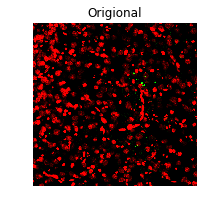

In [3]:
fig = plt.figure(figsize=(3,3))

a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(img)
a.set_title('Origional')
a.set_axis_off()

fig.savefig('Up-Close.png')

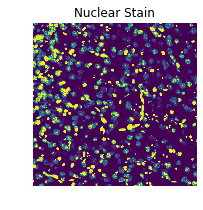

In [4]:
fig = plt.figure(figsize=(3,3))

a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(nucl)
a.set_title('Nuclear Stain')
a.set_axis_off()

fig.savefig('Nucl.png')

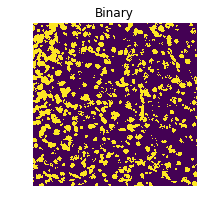

In [5]:
fig = plt.figure(figsize=(3,3))

a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(binary)
a.set_title('Binary')
a.set_axis_off()

fig.savefig('binary.png')

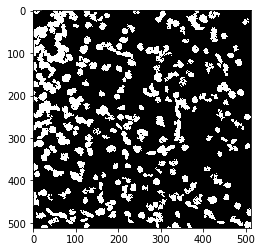

In [6]:
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=100)
plt.imshow(clim, cmap='gray')
plt.show()

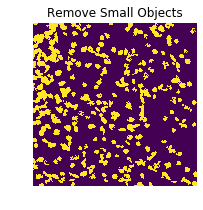

In [8]:
fig = plt.figure(figsize=(3,3))

a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(clim)
a.set_title('Remove Small Objects')
a.set_axis_off()

fig.savefig('clim.png')

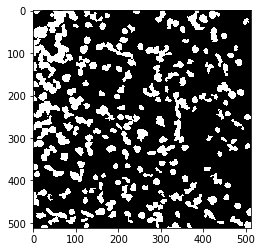

In [9]:
from skimage.filters.rank import median
from skimage.morphology import disk
from scipy import ndimage as ndi

fill_cells = median(ndi.binary_fill_holes(clim), disk(2))
plt.imshow(fill_cells, cmap='gray')
plt.show()

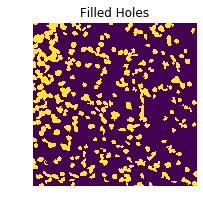

In [10]:
fig = plt.figure(figsize=(3,3))

a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(fill_cells)
a.set_title('Filled Holes')
a.set_axis_off()

fig.savefig('fill_cells.png')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(fill_cells)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((5,5)),
                            labels=fill_cells)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=fill_cells)

C:\Users\Emily\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


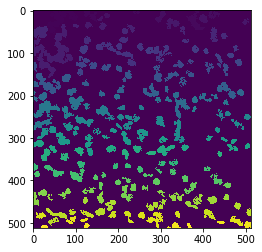

In [7]:
lbim = skimage.measure.label(clim) #clean image that is labeled with each object being a different number

plt.imshow(lbim)
plt.show()

In [8]:
import numpy as np
import math as m

props = skimage.measure.regionprops(lbim)

numobj = lbim.max()

objects = np.zeros((numobj, 6)) #rows, columns

i = 0 
while i < numobj:
    objects[i,0] = (i + 1)
    objects[i,1] = props[i].centroid[0] #x-coordinate
    objects[i,2] = props[i].centroid[1] #y-coordinate
    objects[i,3] = props[i].area
    objects[i,4] = props[i].perimeter  
    objects[i,5] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
    i = i + 1

In [9]:
import numpy as np 

threshold = 2 #roundness ratio set

onlyround = lbim.copy()

i = 0
numobj = onlyround.max()
while i < numobj:
    if objects[i,5] > threshold:
        objects = np.delete(objects, (i), axis=0)
        sizeobj = np.zeros((1, int(objects[i,3])))
        for j in sizeobj:
            onlyround[onlyround == i] = 0
    numobj = len(objects)
    i = i + 1

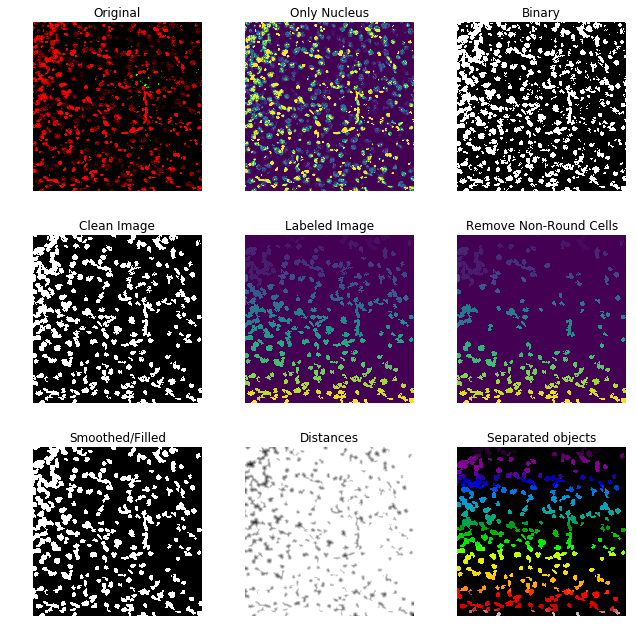

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))

a = fig.add_subplot(3,3,1)
imgplot = plt.imshow(img)
a.set_title('Original')
a.set_axis_off()

a = fig.add_subplot(3,3,2)
imgplot = plt.imshow(nucl)
a.set_title('Only Nucleus')
a.set_axis_off()

a = fig.add_subplot(3,3,3)
imgplot = plt.imshow(binary, cmap='gray')
a.set_title('Binary')
a.set_axis_off()

a=fig.add_subplot(3,3,4)
imgplot = plt.imshow(clim, cmap='gray')
a.set_title('Clean Image')
a.set_axis_off()

a = fig.add_subplot(3,3,5)
imgplot = plt.imshow(lbim)
a.set_title('Labeled Image')
a.set_axis_off()

a=fig.add_subplot(3,3,6)
imgplot = plt.imshow(onlyround)
a.set_title('Remove Non-Round Cells')
a.set_axis_off()

a=fig.add_subplot(3,3,7)
imgplot = plt.imshow(fill_cells, cmap=plt.cm.gray, interpolation='nearest')
a.set_title('Smoothed/Filled')
a.set_axis_off()

a = fig.add_subplot(3,3,8)
imgplot = plt.imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
a.set_title('Distances')
a.set_axis_off()

a=fig.add_subplot(3,3,9)
imgplot = plt.imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
a.set_title('Separated objects')
a.set_axis_off()

fig.tight_layout()
plt.show()
 
fig.savefig('Image_Segmentation.png')

In [8]:
part = [n, 2] #n-particles, x/y coordinates
for i in range(0,n):
    dist = ED [part[n:0],part[n:1]]

NameError: name 'n' is not defined

In [ ]:
How many centers are in the surrounding area?
Draw a circle around each cell and determine the area covered by cells?

Print out average cell area, perimeter, number of cells etc. 

Watershed